# Interactive Data Visualization with folium and Dash

Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>
Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This tutorial is prepared for TMF summer school on 03.07.2019

# Learning Objectives
By the end of this slide, the participants should be able to:
* Develop a data-driven web application with Dash

### Interactive Web application with Dash
* https://dash.plot.ly/gallery <br>
* Dash is a Python framework for creating data-driven web applications <br>
* Dash apps are written on top of Flask, Plotly, and React
 * Flask is a Python web framework
 * Plotly is specifically a charting library built on top of D3.js
 * React is a JavaScript library for building user interfaces maintained by Facebook and a community 

**Agenda**
* <b>Case Study 1: Dr. John Snow Cholera Outbreak (Geodata Visualization)</b>
* </b>Case Study 2: Labitems Trend Visualization</b>

## Case Study 1:  Dr. John Snow Cholera Outbreak (Geodata Visualization)
This case study is inspired by [here](https://rubygems.pkg.github.com/PHI-Case-Studies/1854-Cholera-Outbreak-London) <br>
This case study will recreate the approach that Dr. John Snow solved the cholera outbreak in London in 1854. <br>

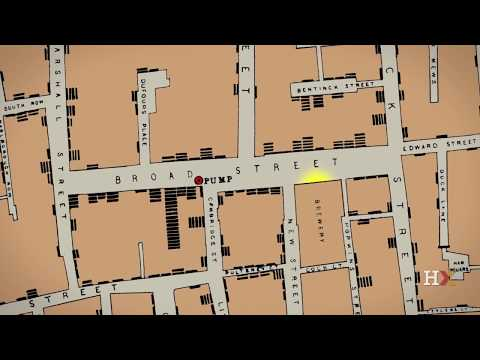

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('lNjrAXGRda4')

<img src="./images/John_Snow.png" alt="John Snow" style="float:left; padding-right:30px; height:400px; width:250px;"/>
<img src="./images/20040209cholera.jpg" style="float:right; padding-left:30px; height:400px; width:400px;"/>

Dr. John Snow was a physician from London in 1854 when a cholera outbreak occurred in the Soho district, in the West End of London. <b>There was widespread belief that "Miasma" or bad air and stench was the cause of the cholera outbreak in Soho district. However, Dr. Snow was skeptical of the Miasma theory and was certain that cholera was likely a water-borne illness.</b> In addition to his systematic process of determining how cholera is transmitted, he began to create maps of the Cholera deaths in Soho and to map the locations of water pumps within the neighborhood. 
<br><br>
<b> Original map by Dr. John Snow shown on the right </b> showing the clusters of cholera cases in the London epidemic of 1854, drawn and lithographed by Charles Cheffins.

### Import Folium (1/5)
https://python-visualization.github.io/folium/#<br>
`folium` is a Python web mapping package that can map data on a Leaflet map.

In [1]:
import folium
from folium import plugins
import pandas as pd

### Create a basemap of Soho District (2/5)
`Foluim` will plot the map object based on `OpenStreetMap (OSM)`. <br> `OSM` is a publicly available world map based on crowdsourced geographic information.

In [2]:
# the latitude and Longitude coordinates of the Soho District center
SOHO_COORDINATES = (51.513578, -0.136722)
map_soho = folium.Map(location = SOHO_COORDINATES, width = "100%", zoom_start = 15) # max zoom: 18
map_soho

Plot the map with Stamentoner themes that looks more similar to the original cholera map <br>
FYI, another popular theme is 'cartodbpositron'

In [3]:
folium.TileLayer('stamentoner').add_to(map_soho)
map_soho

###  Load and prepare the data (3/5)
The mortality data set has been collected by Dr. Snow from the Registrar's Office and from hospital records. 

In [4]:
df_pumps = pd.read_csv('resources/johnsnow_pumps.csv')
df_pumps.head(3)

,FID,LON,LAT
0,250,-0.136668,51.513341
1,251,-0.139586,51.513876
2,252,-0.139671,51.514906


In [5]:
df_deaths = pd.read_csv('resources/cholera_deaths.csv')
df_deaths.head(3)

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317


Based on the given data set, three list objects need to be created. 
* `coordinates_p` stores all coordinates of pumps
* `coordinates_d` stores all coordinates of deaths
* `totaldeath` contains the number of deaths for each coordinate. This will determine the radius size of a marker

In [6]:
coordinates_p = df_pumps[["LAT","LON"]].values.tolist()
coordinates_d = df_deaths[["LAT","LON"]].values.tolist()
totaldeaths   = df_deaths[["DEATHS"]].values.tolist()
# Note that multiple functions can be chained together like above: .values.to_list()

###  Mapping the mortality data to the basemap (4/5)
Let us augument the basemap with mortality data set. Iterate the data set and map the `LAT` and `LON` values in `coordinates_d`. RegularPolygonMarker creates custom markers that draw red circles instead of points. The radius of the circle will be determined by the number of deaths in `totaldeaths`

In [7]:
for i in range(0, len(coordinates_d)):
    popup = folium.Popup(f'Location: [{round(coordinates_d[i][0],2)},{round(coordinates_d[i][1],2)}], Deaths: {totaldeaths[i][0]}')
    folium.RegularPolygonMarker(coordinates_d[i], radius = totaldeaths[i], \
                                stroke = False, fill_color = "red", fill_opacity = 0.5, number_of_sides = 12, \
                                popup = popup
                               ).add_to(map_soho) 
map_soho

###  Mapping the water pump data to the basemap (5/5)

In [8]:
for i in range(0, len(coordinates_p)):
    popup = folium.Popup(f'Pump: [{round(coordinates_p[i][0],2)},{round(coordinates_p[i][1],2)}]')
    folium.RegularPolygonMarker(coordinates_p[i], radius = 10, \
                                stroke = False, fill_color = "blue", fill_opacity = 1, \
                                popup = popup
                               ).add_to(map_soho)
map_soho

<img src="./images/John_Snow_memorial_and_pub.jpg"  style="float:left; padding-left:30px; padding-right:30px; height:300px; width:400px;"/>
The pump handle was removed on September 8, 1854 and remains as John Snow memorial on Broadwick Street, Soho. The public house named after Dr. John Snow is also seen behind the pump

**Agenda**
* </b>Case Study 1: Dr. John Snow Cholera Outbreak (Geodata Visualization)</b>
* <b>Case Study 2: Labitems Trend Visualization</b>

## Case Study 2: Labitems Trend Visualization
[Trend analysis](https://en.wikipedia.org/wiki/Trend_analysis) is the widespread practice of collecting information and attempting to spot a pattern. This case study will illustrate a drug reaction of a sepsis patient. This case study tracks the biomarker and prescription history of patient 41976. It visualizes the relation between two key biomarkers of sepsis (White Blood Cells and Neutrophils) and 

* '41976' patient is choosen for this case study because this patient contains most and interesting records among other sepsis patients '10006', '10013', '10036', '10056', '40601'

### Import Python pakages (1/6)

In [1]:
# # Dash packages installation
# !conda install -c conda-forge dash-renderer -y
# !conda install -c conda-forge dash -y
# !conda install -c conda-forge dash-html-components -y
# !conda install -c conda-forge dash-core-components -y
# !conda install -c conda-forge plotly -y

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import flask
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
import pandas.io.sql as psql

### Data collection (2/6)
* Change the path in case your MIMIC dataset is located at different folder
* Query `d_labitems` table (Dictionary table for mapping)
* Query `labevents` table (History of the labitem order)
* Join two tables
* Query `prescriptions` table (History of the prscription order)

In [3]:
d_lab = pd.read_csv("data/D_LABITEMS.csv")
d_lab.columns = map(str.lower, d_lab.columns)
d_lab.drop(columns = ['row_id'], inplace = True)

lab = pd.read_csv("data/LABEVENTS.csv")
lab.columns = map(str.lower, lab.columns)
lab = lab[lab['subject_id'] == 41976]
lab.drop(columns = ['row_id'], inplace = True)

lab = pd.merge(d_lab, lab, on = 'itemid', how = 'inner')
lab.head()

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,charttime,value,valuenum,valueuom,flag
0,51463,Bacteria,Urine,Hematology,5769-5,41976,173269.0,2199-01-13 15:50:00,RARE,NaN,NaN,NaN
1,51463,Bacteria,Urine,Hematology,5769-5,41976,172082.0,2200-03-17 19:30:00,RARE,NaN,NaN,NaN
2,51463,Bacteria,Urine,Hematology,5769-5,41976,176016.0,2199-01-31 18:46:00,RARE,NaN,NaN,NaN
3,51463,Bacteria,Urine,Hematology,5769-5,41976,152032.0,2200-06-09 15:20:00,MOD,NaN,NaN,NaN
4,51463,Bacteria,Urine,Hematology,5769-5,41976,NaN,2198-09-29 12:02:00,FEW,NaN,NaN,NaN


In [4]:
presc = pd.read_csv("data/PRESCRIPTIONS.csv")
presc.columns = map(str.lower, presc.columns)
presc = presc[presc['subject_id'] == 41976]
presc.drop(columns = ['row_id'], inplace = True)
presc.head()

,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
5674,41976,152032,234541.0,2200-06-10 00:00:00,2200-06-11 00:00:00,BASE,0.9% Sodium Chloride,NaN,NaN,NS1000,1210.0,3.380049e+08,1000mL Bag,1000,mL,1,BAG,IV
5675,41976,152032,234541.0,2200-06-10 00:00:00,2200-06-11 00:00:00,BASE,SW,NaN,NaN,SW50,NaN,0.000000e+00,50 mL Bag,100,mL,2,BAG,IV
5676,41976,152032,234541.0,2200-06-10 00:00:00,2200-06-11 00:00:00,MAIN,Magnesium Sulfate,NaN,NaN,MAG2PM,16546.0,4.096729e+08,2 g / 50 mL Premix Bag,4,gm,2,BAG,IV
5677,41976,152032,234541.0,2200-06-10 00:00:00,2200-06-11 00:00:00,MAIN,Potassium Chloride,Potassium Chloride,Potassium Chloride,POTA20,22346.0,5.817702e+10,20 mEq SR Tablet,40,mEq,2,TAB,PO
5678,41976,152032,234541.0,2200-06-10 00:00:00,2200-06-11 00:00:00,MAIN,Potassium Chloride,Potassium Chloride,Potassium Chloride (Powder),KCL20P,1262.0,4.560663e+08,20mEq Packet,40,mEq,2,PKT,PO


###  Data preparation for labevents table (3/6)
* Convert data type to datetime and extract only year value 

In [5]:
lab['charttime'] = pd.to_datetime(lab['charttime'], errors = 'coerce')
lab.sort_values(by='charttime', inplace=True)
lab.set_index('charttime', inplace = True)
lab.head(1)

,itemid,label,fluid,category,loinc_code,subject_id,hadm_id,value,valuenum,valueuom,flag
charttime,,,,,,,,,,,
2198-09-29 07:50:00,51237,INR(PT),Blood,Hematology,5895-7,41976,NaN,3.6,3.6,NaN,abnormal


###  Data preparation for prescriptions table (4/6)
* Filter conditions:
 * unit: 'mg'
 * antibiotics medicines: ('Vancomycin','Meropenem','Levofloxacin')
* Contruct a normalized dose column
* Convert data type to datetime and extract only year value 

In [6]:
presc['dose_val_rx'] = pd.to_numeric(presc['dose_val_rx'], errors = 'coerce')
presc = presc[presc['dose_unit_rx']=='mg']
presc = presc[presc['drug'].isin(['Vancomycin','Meropenem','Levofloxacin'])]

temp_df = pd.DataFrame()
for item in presc.drug.unique():
    temp = presc[presc['drug'].str.contains(item)]
    temp['norm_size'] = temp['dose_val_rx'] / temp['dose_val_rx'].max()
    temp_df = temp_df.append(temp)
presc = pd.merge(presc, temp_df, on=list(presc.columns))

presc['startdate'] = pd.to_datetime(presc['startdate'], errors = 'coerce')
presc.sort_values(by='startdate', inplace=True)
presc.set_index('startdate', inplace = True)
presc.head(1)

C:\Users\hk17\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,subject_id,hadm_id,icustay_id,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route,norm_size
startdate,,,,,,,,,,,,,,,,,,
2198-10-29,41976,125449,285272.0,2198-11-01 00:00:00,MAIN,Vancomycin,NaN,NaN,VANC1F,43952.0,338355248.0,1g Frozen Bag,1000.0,mg,1,BAG,IV,1.0


###  Create a structure and presentation of your web with HTML and CSS (5/6)

In [7]:
list_patient = ['41976']
list_biomarker = ['White Blood Cells', 'Neutrophils']
list_drug = ['Vancomycin','Meropenem','Levofloxacin']

# stylesheets = ['./resources/bWLwgP.css']
app = dash.Dash()

app.layout = html.Div([

    dcc.Dropdown(
        id = 'patient',
        value = '41976',
        multi = False,
        options = [{'label': i, 'value': i} for i in list_patient],
    ),
    dcc.Dropdown(
        id = 'biomarker',
        value = 'White Blood Cells',
        multi = False,
        options = [{'label': i, 'value': i} for i in list_biomarker],
    ),
    dcc.Dropdown(
        id = 'drug',
        value = ['Vancomycin'],
        multi = True,
        options = [{'label': i, 'value': i} for i in list_drug],
    ),
    dcc.Graph(id = 'graph'),
])

###  Define the reactive behavior with Python (6/6)

In [8]:
@app.callback(Output('graph', 'figure'), 
              [Input('patient', 'value'),
               Input('biomarker', 'value'),
               Input('drug', 'value')])
def update_graph(patient, biomarker, drug):
    traces = []
    temp_l = lab[lab['subject_id'].astype(str) == patient]
    temp_p = presc[presc['subject_id'].astype(str) == patient]
    temp_min = 0
    
    item = biomarker
    temp = temp_l[temp_l['label'] == item]
    temp_min = float(temp.value.astype(float).min())
    trace = go.Scatter(
                x = temp.index,
                y = temp.value,
                name = item,
                mode = 'lines+markers',
            )
    traces.append(trace)
        
    for i, item in enumerate(drug):
        temp = temp_p[ temp_p['drug'] == item]
        trace = go.Scatter(
                    x = temp.index,
                    y = np.ones((1, len(temp)))[0] * temp_min - i - 1,
                    name = item,
                    mode = 'markers',
                    marker = {
                        'size': temp.norm_size * 10
                    }
                )
        traces.append(trace)
    
    layout = go.Layout(
        legend = {'x': 0.5, 'y': -0.1, 'orientation': 'h', 'xanchor': 'center'},
        margin = {'l': 300, 'b': 10, 't': 10, 'r': 300},
        hovermode = 'closest',
    )
    return {'data': traces, 'layout': layout}

In [ ]:
app.run_server(port = 8050)

## Takeaway
* Python is the first class citizenship in the data science world
 * It is a power tool to analyze and visualize data
 * It can also develop a data-driven web application

* Docker decouples the application from the infrastructure
 * It enables you to deliver your solution quickly

## External Resources (1/2)
* Docker
 * https://docs.docker.com/get-started/
* Introductory course of Python as a data analysis tool
 * Getting and Cleaning Data (Johns Hopkins University)
 * https://www.coursera.org/learn/data-cleaning#
* Introductory course of Data Science 
 * Foundations of Data Science — Spring 2016 (Berkeley University) 
 * https://data-8.appspot.com/sp16/

## External Resources (2/2)
* Kaggle: the largest and most diverse data community in the world
 * Competitions and take an advantage of using “Kernels”
 * www.kaggle.com/competitions
 * Example kernels:
   * Can you improve lung cancer detection? (https://goo.gl/MV01o3)
   * Transforming How We Diagnose Heart Disease (https://goo.gl/b9Rta1)
   * Predict West Nile virus in mosquitos across the city of Chicago (https://goo.gl/VdVKtF)
   * and more
* Visualization examples
 * Matplotlib (https://matplotlib.org/gallery/index.html)
 * Plotly (https://plot.ly/python/)



# Question?
Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019